In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [7]:
df = pd.read_csv('tempo.csv',sep=';')
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [16]:
aparencia = df.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

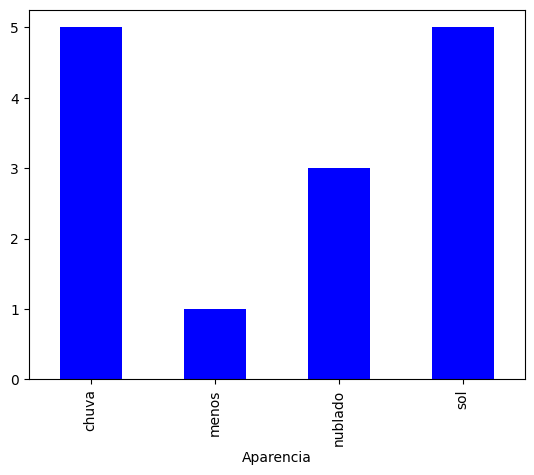

In [24]:
aparencia.plot.bar(color='blue')

Primeira análise exploratória, encontramos:
Erro na coluna "Aparencia",  a informação de nome "menos" esta incorreta  nesta coluna

In [38]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


<Axes: >

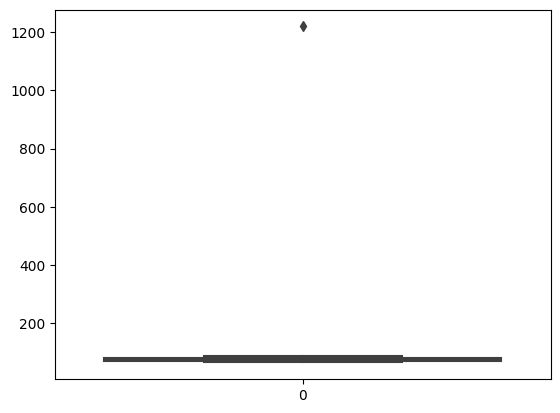

In [39]:
srn.boxplot(df['Temperatura'])

In [43]:
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [46]:
df.loc[df['Temperatura'] >= 155,'Temperatura'] = 73.5

In [47]:
df['Temperatura']

0     85.0
1     80.0
2     83.0
3     70.0
4     68.0
5     65.0
6     64.0
7     73.5
8     69.0
9     75.0
10    75.0
11    72.0
12    81.0
13    71.0
Name: Temperatura, dtype: float64

Encontramos um problema no campo "Temperatura", corrigimos utilizando o valor médio

In [60]:
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,73.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [61]:
df['Umidade'].describe()

count     14.000000
mean      88.607143
std       33.468802
min       65.000000
25%       70.875000
50%       82.500000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [53]:
df['Umidade'].fillna(mediana,inplace=True)

Text(0.5, 1.0, 'Umidade')

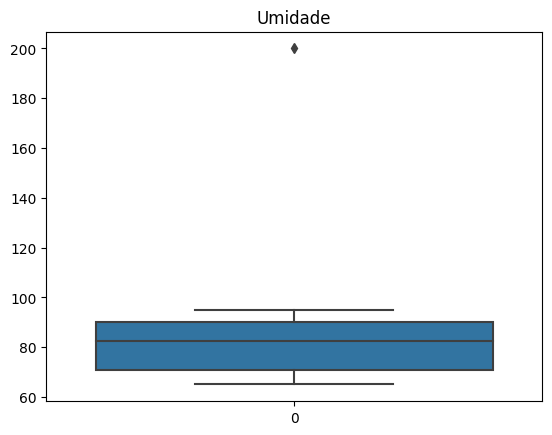

In [62]:
srn.boxplot(df['Umidade']).set_title('Umidade')

In [33]:
df.loc[df['Umidade'] >= 100,'Umidade'] = median

In [34]:
df['Vento'].groupby(df['Vento']).count()

Vento
FALSO         8
VERDADEIRO    6
Name: Vento, dtype: int64

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,FALSO,sim
